# 비정형 데이터마이닝

In [6]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

1.&nbsp; 'instagram_태교여행.txt' 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 싱행하시오.

In [3]:
data_path = '/hdd/data/adp_data/instagram_태교여행.txt'
with open(data_path, 'r', encoding = 'cp949') as file:
    data = [re.sub(r'[^가-힣a-zA-Z\s]', '', line.strip()) for line in file]
data[:5]

['쇼퍼걸  예비맘 태교여행 괌 임신개월 배 부르게 밥 먹고 오빠 생일선물 산다고 다니다가 뜻밖에 내 가방도 득템 가방더 안실려고했는데   앙  기분 완전 좋음   이제 렌트하고 돌아댕기야지',
 '태교여행  몰디브 한식을 꼭 먹어야 했었던 임산부 땜에 남편은 몰디브에서도 김치찌개를 끓였어야 했다',
 '하음이가 사랑이 뱃속에 있은 지 임신개월째 여행가서 찍은 사진 여행이라고는 하지만 온통 머릿속은 사랑이 건강과 더불어 개월 후 빛을 볼 하음이에 쏠려 있어 시드니의 분위기와 풍경보다는 우리 둘의 시간에 집중했던  sidney  부부  태교여행  호주  시드니  오페라하우스  아이고 멋져라  임신개월',
 '행복했던  제주여행 화창한 날씨 푸르른 바다 맑고 쾌청한 하늘 나는 오늘  바다 와 깔맞춤 블루뚜 instadaily daily dailylook selfie 셀피 제주도 용머리해안 힐링 바다스타그램 임산부 태교여행 폭스베스트 겨울코디 뚜뚜 뚜뚜네',
 '떠나자  오키나와 hyenitwinkle 별똥이와 함께 떠나는 호야와 혜니의 태교여행 supreme  supremetnf  supremeundercover  nmc  pumphoya  슈프림  섭리미  슈노  슈노캐리어  슈언코치  나매  슈매  펌프호야  태교여행  오키나와']

2.&nbsp; 전처리된 데이터에서 '태교여행'이란 단어를 사전에 추가하고 명사를 추출해 출현빈도 10위까지 막대그래프로 시각화하시오.

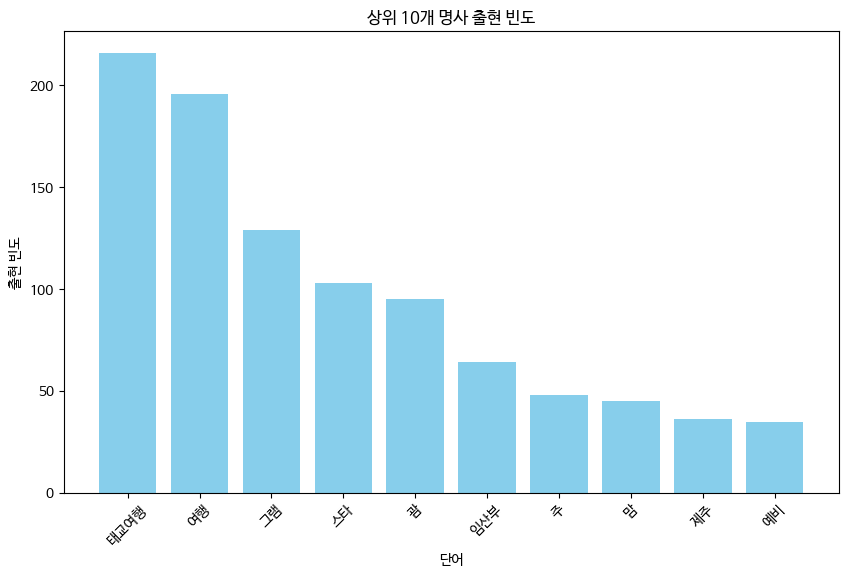

In [5]:
def add_custom_noun(text, custom_nouns):
    for noun in custom_nouns:
        text = text.replace(noun, f'{noun} ')
    return text

custom_nouns = ['태교여행']
data = [add_custom_noun(line, custom_nouns) for line in data]

okt = Okt()

nouns = []
for line in data:
    nouns.extend(okt.nouns(line))

noun_counts = Counter(nouns)
top_nouns = noun_counts.most_common(10)
words, counts = zip(*top_nouns)

plt.figure(figsize = (10, 6))
plt.bar(words, counts, color = 'skyblue')
plt.xlabel('단어')
plt.ylabel('출현 빈도')
plt.title('상위 10개 명사 출현 빈도')
plt.xticks(rotation = 45)
plt.show()

3.&nbsp; 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

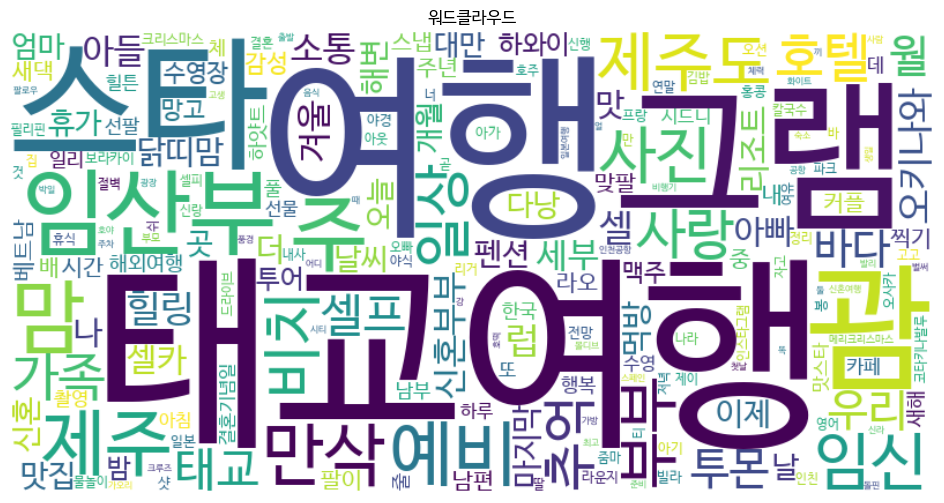

In [7]:
wordcloud = WordCloud(
    font_path = font_path, background_color = 'white', width = 800, height = 400
).generate_from_frequencies(noun_counts)

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('워드클라우드')
plt.show()